In [137]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [138]:
# Read and display data
df = pd.read_csv('Mall_Customers.csv')
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [140]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


/Users/manaradel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


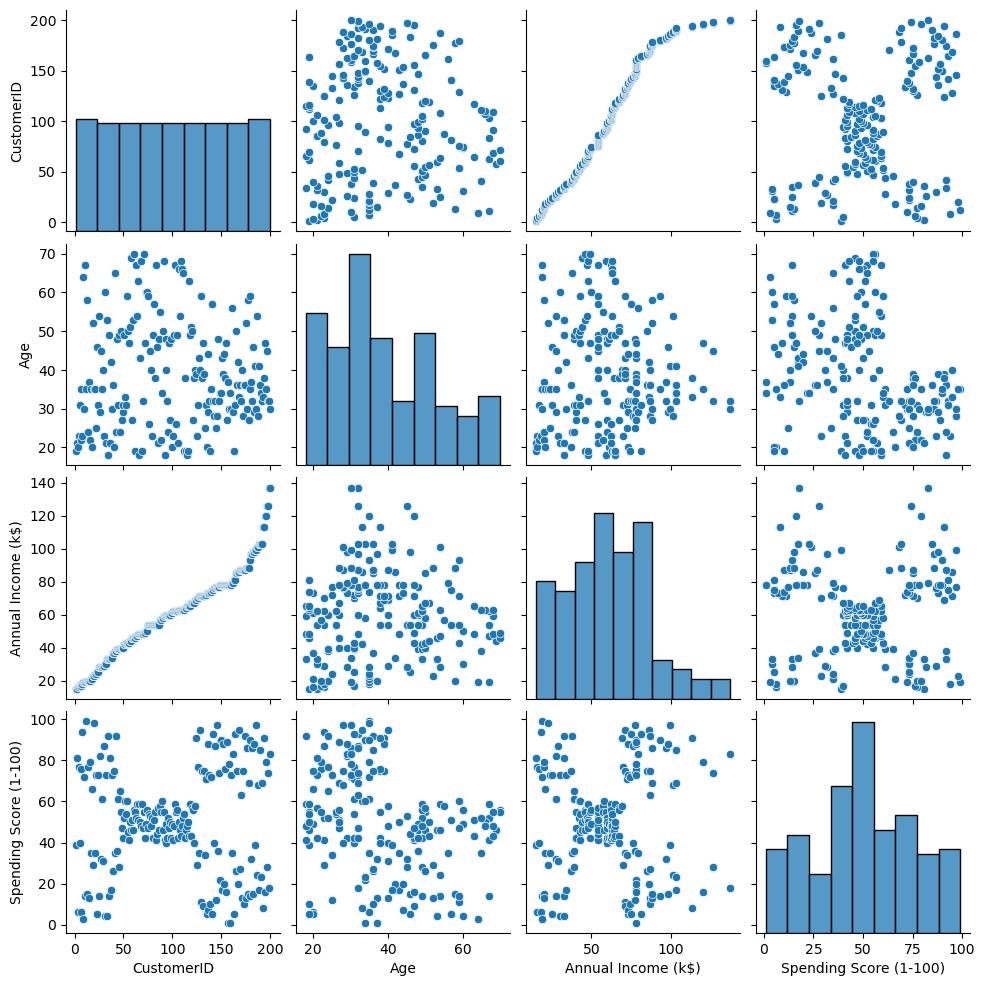

In [141]:
# Visualize data
sns.pairplot(df)

<Axes: xlabel='Gender', ylabel='count'>

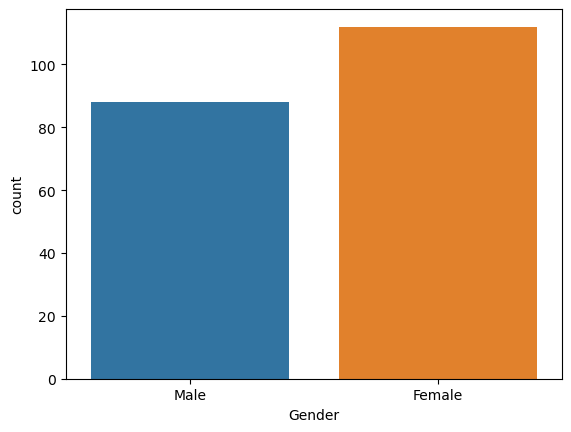

In [142]:
# Visualize the distribution of customers across different gender
sns.countplot(data=df, x=df['Gender'])

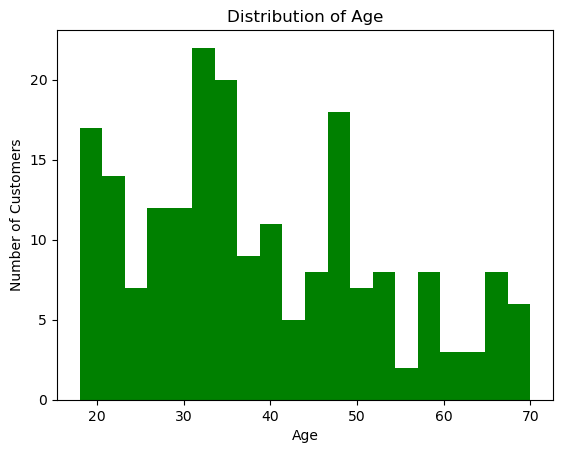

In [143]:
# Visualize the distribution of customers across different age groups
plt.hist(df['Age'], bins=20, color='g')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()




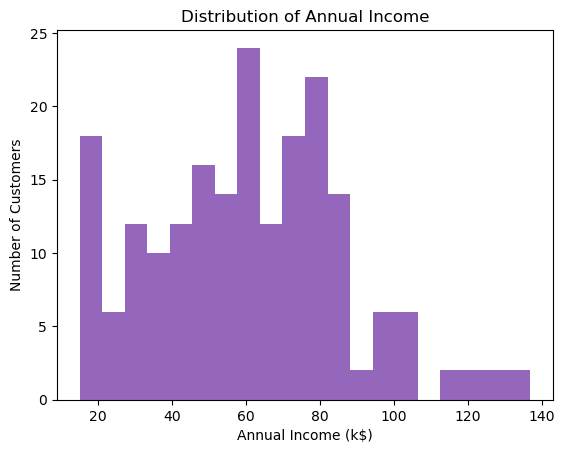

In [144]:
# Visualize the distribution of customers across different annual income
plt.hist(df['Annual Income (k$)'], bins=20, color='tab:purple')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of Customers')
plt.show()

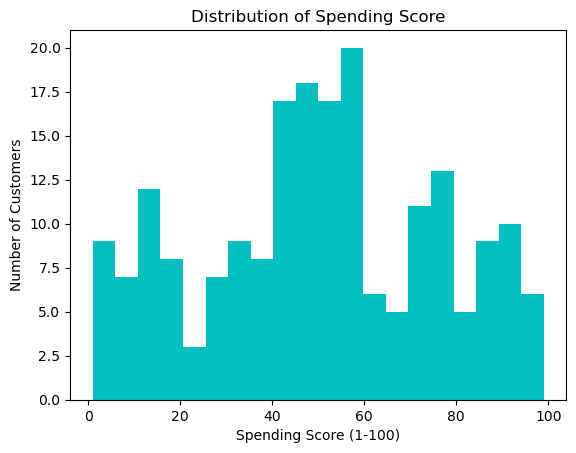

In [145]:
# Visualize the distribution of customers across different spending score
plt.hist(df['Spending Score (1-100)'], bins=20, color='c')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of Customers')
plt.show()

In [146]:
#Customer Segmentation : Gender, Age, Spending Score, Annual Income

# Change the Gender Column to numerical Values
# First, create a dictionary that maps the original gender categories to their corresponding binary values
gender_dict = {'Male': 1, 'Female': 0}

# Next, apply the map() function to the 'Gender' column using the gender_dict dictionary
df['Gender'] = df['Gender'].map(gender_dict)
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


<Axes: >

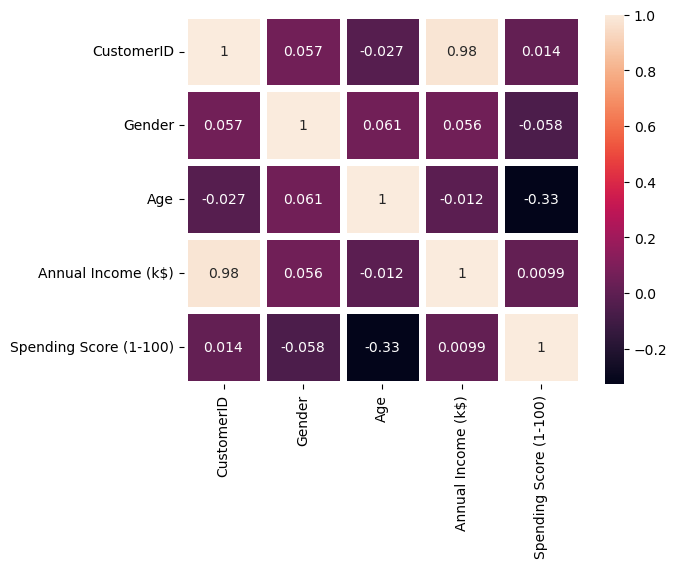

In [147]:
sns.heatmap(df.corr(), annot=True, linewidths=5)

In [148]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [149]:
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit_predict(df_scaled)
df['Cluster'] = kmeans.labels_
df.head(50)

/Users/manaradel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,3
2,3,0,20,16,6,3
3,4,0,23,16,77,3
4,5,0,31,17,40,3
5,6,0,22,17,76,3
6,7,0,35,18,6,2
7,8,0,23,18,94,3
8,9,1,64,19,3,4
9,10,0,30,19,72,3


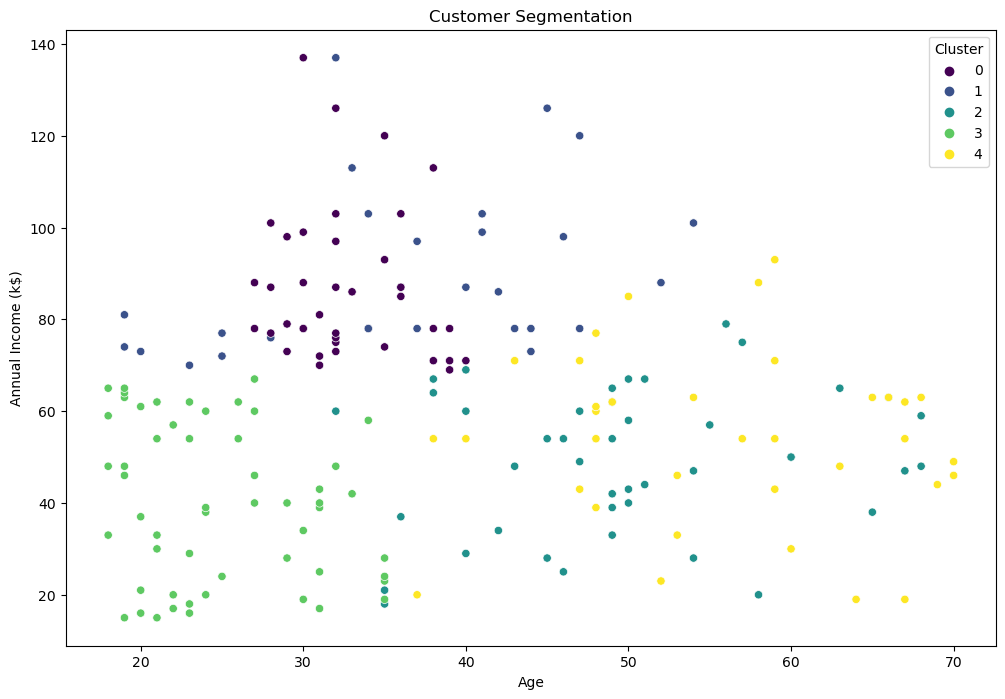

In [150]:
# Visualize the clusters: Age vs Annual Income
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.show()

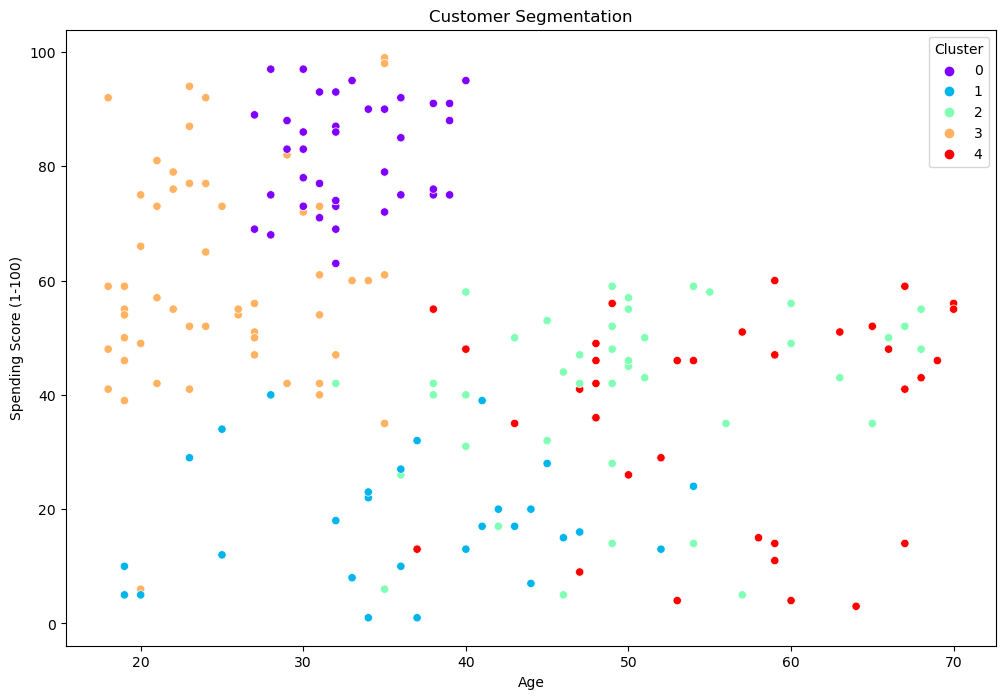

In [151]:
# Visualize the clusters: Age vs Spending Score
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', palette='rainbow')
plt.title('Customer Segmentation')
plt.show()

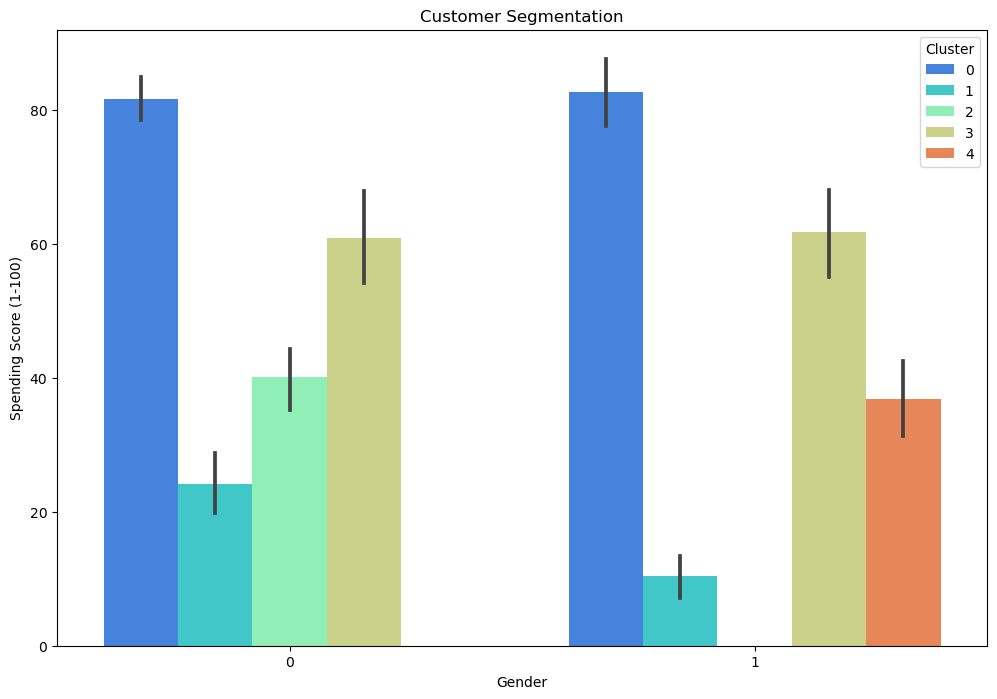

In [154]:
# Visualize the clusters: Gender vs Spending Score
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Gender', y='Spending Score (1-100)', hue='Cluster', palette='rainbow')
plt.title('Customer Segmentation')
plt.show()

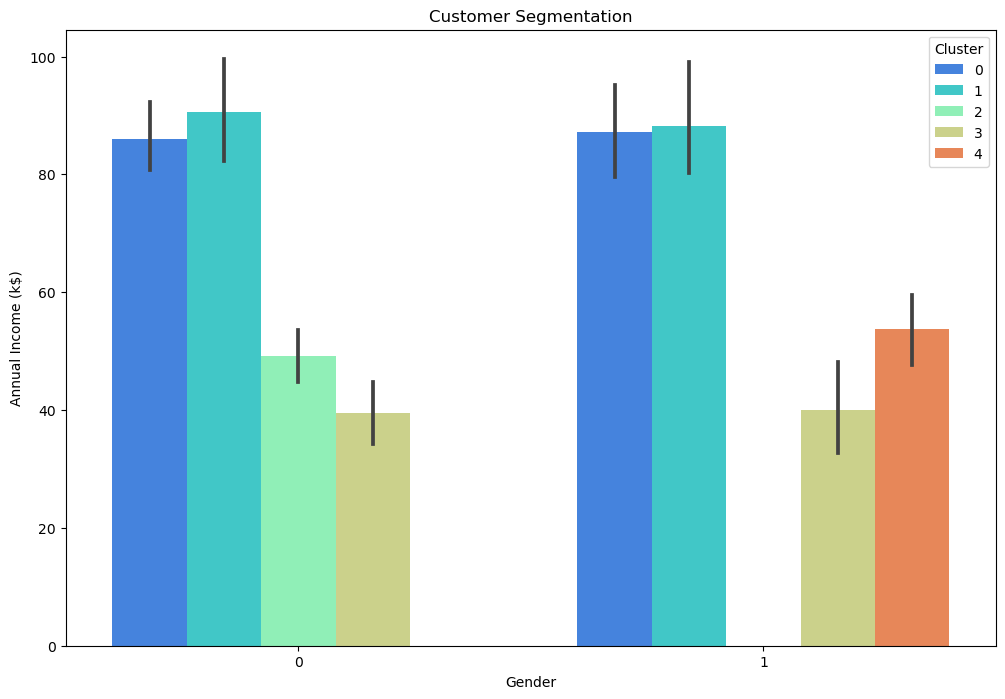

In [155]:
# Visualize the clusters: Gender vs Annual Income
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Gender', y='Annual Income (k$)', hue='Cluster', palette='rainbow')
plt.title('Customer Segmentation')
plt.show()

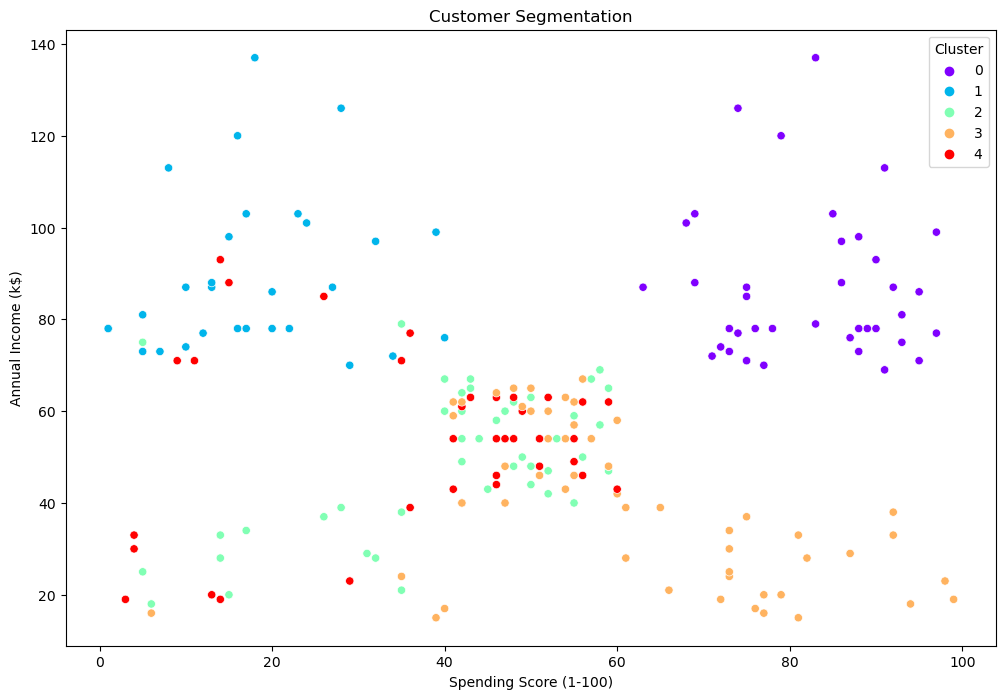

In [158]:
# Visualize the clusters: Spending Score vs Annual Income
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', palette='rainbow')
plt.title('Customer Segmentation')
plt.show()